# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')  

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [12]:
#setting data
top5 = chipo.groupby('item_name').agg({
    'quantity': 'sum'
}).sort_values('quantity', ascending = False)[:5]
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [29]:
top5.reset_index()

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


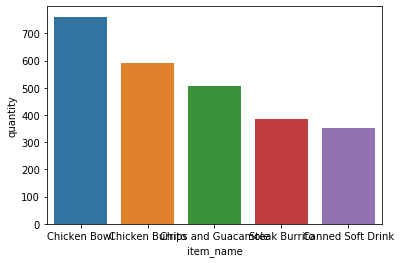

In [33]:
#using seaborn to plot (visually prettier)
import seaborn as sns

sns.barplot(
    x='item_name',
    y='quantity',
    data= top5.reset_index(),
    )

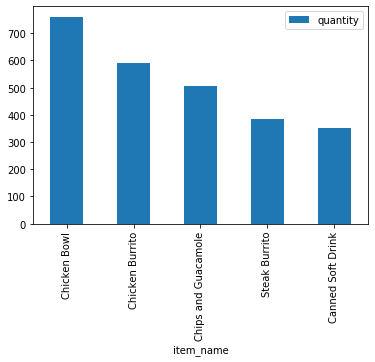

In [28]:
#plotting
top5.plot(kind = 'bar')

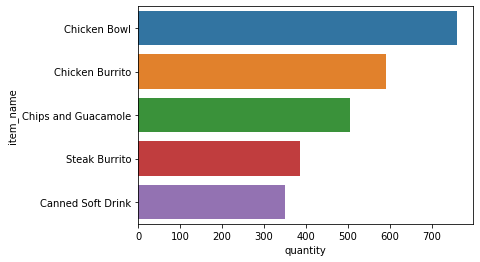

In [32]:
#changing orientation, to make words fit
sns.barplot(
    y='item_name',
    x='quantity',
    data= top5.reset_index(),
    orient= 'h'
    )


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [39]:
#setting data; need to change type for price into float, as it is currently a string which includes '$' 
price= chipo.item_price.str.slice(1).astype(float)
price
#new column inserted into chipo df, which contains only numbers
chipo['price']= price

### Step 7. BONUS: Create a question and a graph to answer your own question.

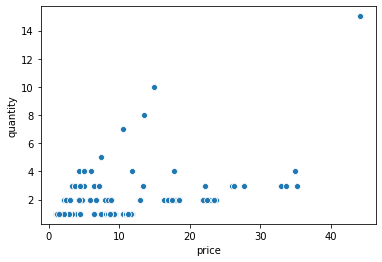

In [47]:
#alternatively using seaborn to plot scatter graph
sns.scatterplot(x='price',y='quantity', data=chipo)

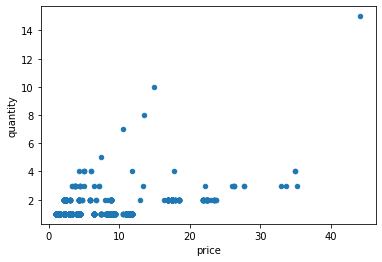

In [42]:
#now plot scatter graph
chipo.plot(x='price', y= 'quantity', kind='scatter')
